<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<title></title>
</head>
<body>
<div style="text-align: center;">
  <h1>Task 1</h1>
  <h2>Comparative Analysis of RF and CNN Models Using HOG Features with 5-Fold Cross-Validation</h2>
</div>


</body>
</html>


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from skimage.io import imread
from skimage.transform import resize


Training Dataset:
Total number of smoking images in training: 358
Total number of not smoking images in training: 358

Testing Dataset:
Total number of smoking images in testing: 112
Total number of not smoking images in testing: 112

Validation Dataset:
Total number of smoking images in validation: 90
Total number of not smoking images in validation: 90

Random images from Training Dataset:


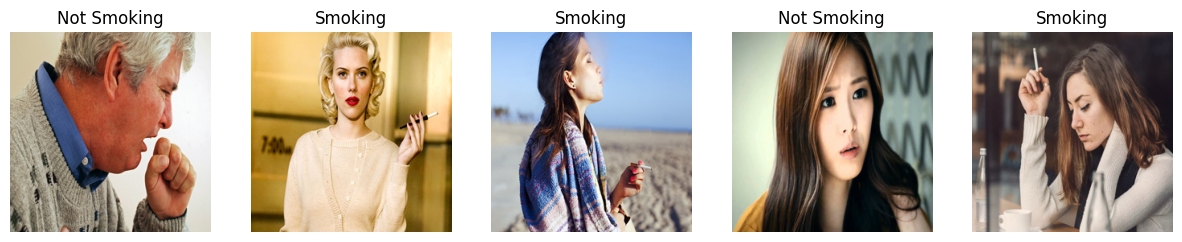


Random images from Testing Dataset:


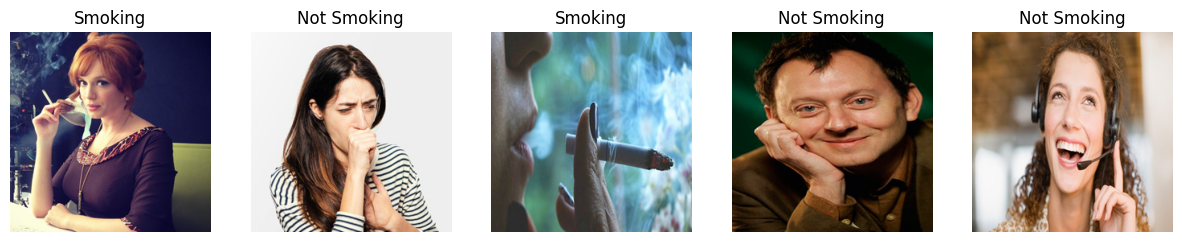


Random images from Validation Dataset:


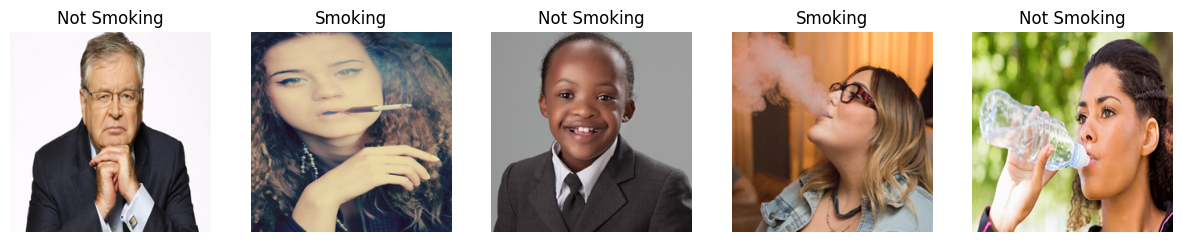

In [85]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Function to load images and count smoking and not-smoking images based on filenames
def load_images_and_labels(directory):
    smoking_images_count = 0
    non_smoking_images_count = 0
    image_data = []
    labels = []
    
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img_path = os.path.join(directory, filename)
            image = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Load in color
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            image_data.append(image)
            
            # Determine label based on filename prefix
            if filename.lower().startswith('smoking'):
                labels.append(1)  # Smoking
                smoking_images_count += 1
            elif filename.lower().startswith('notsmoking'):
                labels.append(0)  # Not Smoking
                non_smoking_images_count += 1
    
    return np.array(image_data), np.array(labels), smoking_images_count, non_smoking_images_count

# Define paths to your image directories
training_dir = 'Training'
testing_dir = 'Testing'
validation_dir = 'Validation'

# Load images and labels from directories
train_imgs, train_lbls, train_smoke_count, train_nonsmoke_count = load_images_and_labels(training_dir)
test_imgs, test_lbls, test_smoke_count, test_nonsmoke_count = load_images_and_labels(testing_dir)
val_imgs, val_lbls, val_smoke_count, val_nonsmoke_count = load_images_and_labels(validation_dir)

# Print the counts of images in each category
print("Training Dataset:")
print("Total number of smoking images in training:", train_smoke_count)
print("Total number of not smoking images in training:", train_nonsmoke_count)

print("\nTesting Dataset:")
print("Total number of smoking images in testing:", test_smoke_count)
print("Total number of not smoking images in testing:", test_nonsmoke_count)

print("\nValidation Dataset:")
print("Total number of smoking images in validation:", val_smoke_count)
print("Total number of not smoking images in validation:", val_nonsmoke_count)

# Function to display random images from the dataset
def show_random_images(images, labels, num_imgs=5):
    plt.figure(figsize=(15, 8))
    for i in range(num_imgs):
        index = random.randint(0, len(images)-1)
        plt.subplot(1, num_imgs, i+1)
        plt.imshow(images[index])
        plt.title('Smoking' if labels[index] == 1 else 'Not Smoking')
        plt.axis('off')
    plt.show()

# Display random images from training dataset
print("\nRandom images from Training Dataset:")
show_random_images(train_imgs, train_lbls)

# Display random images from testing dataset
print("\nRandom images from Testing Dataset:")
show_random_images(test_imgs, test_lbls)

# Display random images from validation dataset
print("\nRandom images from Validation Dataset:")
show_random_images(val_imgs, val_lbls)


In [65]:
pip install scikit-image


Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable




[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">

</head>
<body>
    <h2>What is HOG?</h2>
    <p>Histogram of Oriented Gradients (HOG) is a technique used to detect objects in images by focusing on their shapes. First, the color image is converted to grayscale and resized to a standard 128x64 pixels. Gamma correction helps to standardize the color for better contrast and noise reduction. The image is then divided into small 8x8 pixel cells. For each cell, gradients (changes in intensity) are calculated to capture the object's edges. Histograms of these gradients summarize the directions of these changes, which helps to outline the object's shape despite variations in lighting and shadows. HOG is essential for tasks like detecting pedestrians and classifying images based on their content.</p>

 <h2>Example of HOG in Action:</h2>
    <img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*CwYhoTuUPHie6VP5amO63A.png" alt="HOG Example Image">
</body>

<h2> cite:</h2>https://medium.com/@danyang95luck/comparison-of-hog-histogram-of-oriented-gradients-and-sift-scale-invariant-feature-transform-e2b17f61c9a3
</html>


In [67]:
# Function to extract HOG features from an image
def extract_hog_features(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Extract HOG features
    hog_features = hog(
        gray_image, 
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        block_norm='L2-Hys',
        visualize=False  # Remove multichannel argument and set visualize to False
    )
    return hog_features

# Function to extract HOG features from a dataset of images
def extract_features_from_dataset(images):
    features_list = []
    for img in images:
        features = extract_hog_features(img)
        features_list.append(features)
    return np.array(features_list)

# Extract HOG features for training, testing, and validation datasets
train_hog_features = extract_features_from_dataset(train_imgs)
test_hog_features = extract_features_from_dataset(test_imgs)
val_hog_features = extract_features_from_dataset(val_imgs)

# Print shape of the HOG feature arrays
print("Shape of training HOG features:", train_hog_features.shape)
print("Shape of testing HOG features:", test_hog_features.shape)
print("Shape of validation HOG features:", val_hog_features.shape)

Shape of training HOG features: (716, 32400)
Shape of testing HOG features: (224, 32400)
Shape of validation HOG features: (180, 32400)


In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize StratifiedKFold with 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store evaluation metrics for each fold
precision_scores = []
recall_scores = []
f1_scores = []

# Perform 5-fold cross-validation
for fold, (train_index, val_index) in enumerate(skf.split(train_hog_features, train_lbls), 1):
    # Split the data into training and validation sets
    X_train, X_val = train_hog_features[train_index], train_hog_features[val_index]
    y_train, y_val = train_lbls[train_index], train_lbls[val_index]
    
    # Train the RF classifier
    rf_classifier.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred = rf_classifier.predict(X_val)
    
    # Calculate precision, recall, and f1-score
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    
    # Append the scores to the lists
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    
    # Print the metrics for the current fold
    print(f"Fold {fold}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")

# Calculate average precision, recall, and f1-score
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)

# Print the average metrics
print("\nRandom Forest Classifier (HOG Features) - 5-Fold Cross-Validation")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-Score: {avg_f1:.4f}")

# Evaluate on the validation set
val_pred = rf_classifier.predict(val_hog_features)
val_precision = precision_score(val_lbls, val_pred)
val_recall = recall_score(val_lbls, val_pred)
val_f1 = f1_score(val_lbls, val_pred)

print("\nValidation Set Evaluation")
print(f"Precision: {val_precision:.4f}")
print(f"Recall: {val_recall:.4f}")
print(f"F1-Score: {val_f1:.4f}")

# Evaluate on the test set
test_pred = rf_classifier.predict(test_hog_features)
test_precision = precision_score(test_lbls, test_pred)
test_recall = recall_score(test_lbls, test_pred)
test_f1 = f1_score(test_lbls, test_pred)

print("\nTest Set Evaluation")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")


Fold 1
  Precision: 0.6438
  Recall: 0.6528
  F1-Score: 0.6483
Fold 2
  Precision: 0.6849
  Recall: 0.7042
  F1-Score: 0.6944
Fold 3
  Precision: 0.6543
  Recall: 0.7465
  F1-Score: 0.6974
Fold 4
  Precision: 0.7778
  Recall: 0.6806
  F1-Score: 0.7259
Fold 5
  Precision: 0.6667
  Recall: 0.7500
  F1-Score: 0.7059

Random Forest Classifier (HOG Features) - 5-Fold Cross-Validation
Average Precision: 0.6855
Average Recall: 0.7068
Average F1-Score: 0.6944

Validation Set Evaluation
Precision: 0.6667
Recall: 0.6444
F1-Score: 0.6554

Test Set Evaluation
Precision: 0.6975
Recall: 0.7411
F1-Score: 0.7186


In [82]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score
from skimage.feature import hog
import cv2
import os

# Function to load and preprocess images
def load_and_preprocess_images(directory_path):
    images = []
    labels = []
    for file in os.listdir(directory_path):
        if file.endswith('.jpg') or file.endswith('.png'):
            img = cv2.imread(os.path.join(directory_path, file), cv2.IMREAD_COLOR)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            images.append(img)
            if file.lower().startswith('smoking'):
                labels.append(1)
            elif file.lower().startswith('notsmoking'):
                labels.append(0)
    return np.array(images), np.array(labels)

# Function to extract HOG features from grayscale images
def extract_hog_features(images):
    hog_features_list = []
    for img in images:
        # Convert image to grayscale
        gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        # Extract HOG features
        hog_features = hog(
            gray_image,
            pixels_per_cell=(8, 8),
            cells_per_block=(2, 2),
            block_norm='L2-Hys',
            visualize=False,  # Do not visualize
        )
        hog_features_list.append(hog_features)
    return np.array(hog_features_list)

# Define paths to directories containing different types of cigarette-related images
train_path = 'Training'
test_path = 'Testing'
val_path = 'Validation'

# Load and preprocess images
train_images, train_labels = load_and_preprocess_images(train_path)
test_images, test_labels = load_and_preprocess_images(test_path)
val_images, val_labels = load_and_preprocess_images(val_path)

# Extract HOG features from grayscale images
train_hog_features = extract_hog_features(train_images)
test_hog_features = extract_hog_features(test_images)
val_hog_features = extract_hog_features(val_images)

# Reshape HOG features for CNN input (assuming a single channel)
train_hog_features_cnn = train_hog_features.reshape(-1, 180, 180, 1)
test_hog_features_cnn = test_hog_features.reshape(-1, 180, 180, 1)
val_hog_features_cnn = val_hog_features.reshape(-1, 180, 180, 1)

# Convert labels to categorical (one-hot encoding)
train_labels_categorical = tf.keras.utils.to_categorical(train_labels, num_classes=2)
test_labels_categorical = tf.keras.utils.to_categorical(test_labels, num_classes=2)
val_labels_categorical = tf.keras.utils.to_categorical(val_labels, num_classes=2)

# Define CNN model function
def create_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(2, activation='softmax')  # Output layer with 2 classes (smoking and not smoking)
    ])
    return model

# Initialize StratifiedKFold with 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store evaluation metrics for each fold
precision_scores_cnn = []
recall_scores_cnn = []
f1_scores_cnn = []

# Perform 5-fold cross-validation for CNN
for fold, (train_index, val_index) in enumerate(skf.split(train_hog_features_cnn, train_labels), 1):
    # Split the data into training and validation sets
    X_train, X_val = train_hog_features_cnn[train_index], train_hog_features_cnn[val_index]
    y_train, y_val = train_labels_categorical[train_index], train_labels_categorical[val_index]
    
    # Create a new instance of the CNN model
    cnn_model = create_cnn_model(input_shape=X_train.shape[1:])
    
    # Compile the CNN model
    cnn_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
    
    # Train the CNN model
    cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    
    # Evaluate the CNN model on the validation set
    scores = cnn_model.evaluate(X_val, y_val, verbose=0)
    accuracy = scores[1]
    print(f"CNN Model - Fold {fold} - Validation Accuracy: {accuracy:.4f}")
    
    # Predict on the validation set
    y_pred = cnn_model.predict(X_val)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_val_labels = np.argmax(y_val, axis=1)
    
    # Calculate precision, recall, and f1-score
    precision = precision_score(y_val_labels, y_pred_labels)
    recall = recall_score(y_val_labels, y_pred_labels)
    f1 = f1_score(y_val_labels, y_pred_labels)
    
    # Append the scores to the lists
    precision_scores_cnn.append(precision)
    recall_scores_cnn.append(recall)
    f1_scores_cnn.append(f1)
    
    # Print the metrics for the current fold
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")

# Calculate average precision, recall, and f1-score for CNN
avg_precision_cnn = np.mean(precision_scores_cnn)
avg_recall_cnn = np.mean(recall_scores_cnn)
avg_f1_cnn = np.mean(f1_scores_cnn)

# Print the average metrics for CNN
print("\nCNN Model - 5-Fold Cross-Validation")
print(f"Average Precision: {avg_precision_cnn:.4f}")
print(f"Average Recall: {avg_recall_cnn:.4f}")
print(f"Average F1-Score: {avg_f1_cnn:.4f}")

# Evaluate on the validation set for CNN
val_pred = cnn_model.predict(val_hog_features_cnn)
val_pred_labels = np.argmax(val_pred, axis=1)
val_precision = precision_score(val_labels, val_pred_labels)
val_recall = recall_score(val_labels, val_pred_labels)
val_f1 = f1_score(val_labels, val_pred_labels)

print("\nValidation Set Evaluation - CNN Model")
print(f"Precision: {val_precision:.4f}")
print(f"Recall: {val_recall:.4f}")
print(f"F1-Score: {val_f1:.4f}")

# Evaluate on the test set for CNN
test_pred = cnn_model.predict(test_hog_features_cnn)
test_pred_labels = np.argmax(test_pred, axis=1)
test_precision = precision_score(test_labels, test_pred_labels)
test_recall = recall_score(test_labels, test_pred_labels)
test_f1 = f1_score(test_labels, test_pred_labels)

print("\nTest Set Evaluation - CNN Model")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")


CNN Model - Fold 1 - Validation Accuracy: 0.6250
5/5 [==============================] - 1s 135ms/step
  Precision: 0.5978
  Recall: 0.7639
  F1-Score: 0.6707
CNN Model - Fold 2 - Validation Accuracy: 0.6224
5/5 [==============================] - 1s 132ms/step
  Precision: 0.5810
  Recall: 0.8592
  F1-Score: 0.6932
CNN Model - Fold 3 - Validation Accuracy: 0.6783
5/5 [==============================] - 1s 147ms/step
  Precision: 0.6543
  Recall: 0.7465
  F1-Score: 0.6974
CNN Model - Fold 4 - Validation Accuracy: 0.6993
5/5 [==============================] - 1s 139ms/step
  Precision: 0.6495
  Recall: 0.8750
  F1-Score: 0.7456
CNN Model - Fold 5 - Validation Accuracy: 0.5804
5/5 [==============================] - 1s 162ms/step
  Precision: 0.6304
  Recall: 0.4028
  F1-Score: 0.4915

CNN Model - 5-Fold Cross-Validation
Average Precision: 0.6226
Average Recall: 0.7295
Average F1-Score: 0.6597
6/6 [==============================] - 1s 234ms/step

Validation Set Evaluation - CNN Model
Precisi

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        table {
            width: 80%;
            border-collapse: collapse;
            margin: 20px auto;
        }
        th, td {
            border: 1px solid #ddd;
            padding: 8px;
            text-align: center;
        }
        th {
            background-color: #f2f2f2;
        }
        tr:nth-child(even) {
            background-color: #f2f2f2;
        }
    </style>
</head>
<body>
    <h2>Model Comparison: Random Forest vs CNN</h2>

   <h3>Random Forest Classifier (HOG Features)</h3>
    <table>
        <tr>
            <th>Fold</th>
            <th>Precision</th>
            <th>Recall</th>
            <th>F1-Score</th>
        </tr>
        <tr>
            <td>1</td>
            <td>0.6438</td>
            <td>0.6528</td>
            <td>0.6483</td>
        </tr>
        <tr>
            <td>2</td>
            <td>0.6849</td>
            <td>0.7042</td>
            <td>0.6944</td>
        </tr>
        <tr>
            <td>3</td>
            <td>0.6543</td>
            <td>0.7465</td>
            <td>0.6974</td>
        </tr>
        <tr>
            <td>4</td>
            <td>0.7778</td>
            <td>0.6806</td>
            <td>0.7259</td>
        </tr>
        <tr>
            <td>5</td>
            <td>0.6667</td>
            <td>0.7500</td>
            <td>0.7059</td>
        </tr>
        <tr>
            <th>Average</th>
            <td>0.6855</td>
            <td>0.7068</td>
            <td>0.6944</td>
        </tr>
    </table>

   <h3>CNN Model (HOG Features)</h3>
    <table>
        <tr>
            <th>Fold</th>
            <th>Precision</th>
            <th>Recall</th>
            <th>F1-Score</th>
        </tr>
        <tr>
            <td>1</td>
            <td>0.5978</td>
            <td>0.7639</td>
            <td>0.6707</td>
        </tr>
        <tr>
            <td>2</td>
            <td>0.5810</td>
            <td>0.8592</td>
            <td>0.6932</td>
        </tr>
        <tr>
            <td>3</td>
            <td>0.6543</td>
            <td>0.7465</td>
            <td>0.6974</td>
        </tr>
        <tr>
            <td>4</td>
            <td>0.6495</td>
            <td>0.8750</td>
            <td>0.7456</td>
        </tr>
        <tr>
            <td>5</td>
            <td>0.6304</td>
            <td>0.4028</td>
            <td>0.4915</td>
        </tr>
        <tr>
            <th>Average</th>
            <td>0.6226</td>
            <td>0.7295</td>
            <td>0.6597</td>
        </tr>
    </table>

  <h3>Evaluation on Validation Set</h3>
    <table>
        <tr>
            <th>Model</th>
            <th>Precision</th>
            <th>Recall</th>
            <th>F1-Score</th>
        </tr>
        <tr>
            <td>Random Forest</td>
            <td>0.6667</td>
            <td>0.6444</td>
            <td>0.6554</td>
        </tr>
        <tr>
            <td>CNN</td>
            <td>0.6308</td>
            <td>0.4556</td>
            <td>0.5290</td>
        </tr>
    </table>

   <h3>Evaluation on Test Set</h3>
    <table>
        <tr>
            <th>Model</th>
            <th>Precision</th>
            <th>Recall</th>
            <th>F1-Score</th>
        </tr>
        <tr>
            <td>Random Forest</td>
            <td>0.6975</td>
            <td>0.7411</td>
            <td>0.7186</td>
        </tr>
        <tr>
            <td>CNN</td>
            <td>0.7439</td>
            <td>0.5446</td>
            <td>0.6289</td>
        </tr>
    </table>

  <p>Based on the evaluation metrics, the Random Forest Classifier shows a balanced performance across precision, recall, and F1-score. In contrast, the CNN model achieves higher precision on the test set but lower recall compared to Random Forest.</p>

</body>
</html>


<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<title></title>
</head>
<body>
<div style="text-align: center;">
  <h1>Task 2</h1>
  <h2>Comparative Analysis of CNN Models Using Binarized and Non-Binarized Images for Smoking Detection</h2>

</body>
</html>


Epoch 1/10
23/23 [==============================] - 41s 2s/step - loss: 0.7241 - accuracy: 0.5237 - val_loss: 0.6853 - val_accuracy: 0.6000
Epoch 2/10
23/23 [==============================] - 33s 1s/step - loss: 0.5656 - accuracy: 0.6885 - val_loss: 0.5618 - val_accuracy: 0.7556
Epoch 3/10
23/23 [==============================] - 33s 1s/step - loss: 0.5721 - accuracy: 0.7081 - val_loss: 0.5802 - val_accuracy: 0.7222
Epoch 4/10
23/23 [==============================] - 32s 1s/step - loss: 0.5722 - accuracy: 0.7332 - val_loss: 0.6037 - val_accuracy: 0.6167
Epoch 5/10
23/23 [==============================] - 33s 1s/step - loss: 0.5678 - accuracy: 0.7095 - val_loss: 0.5701 - val_accuracy: 0.6833
Epoch 6/10
23/23 [==============================] - 32s 1s/step - loss: 0.5232 - accuracy: 0.7388 - val_loss: 0.5069 - val_accuracy: 0.7278
Epoch 7/10
23/23 [==============================] - 33s 1s/step - loss: 0.4788 - accuracy: 0.7598 - val_loss: 0.5141 - val_accuracy: 0.7611
Epoch 8/10
23/23 [==

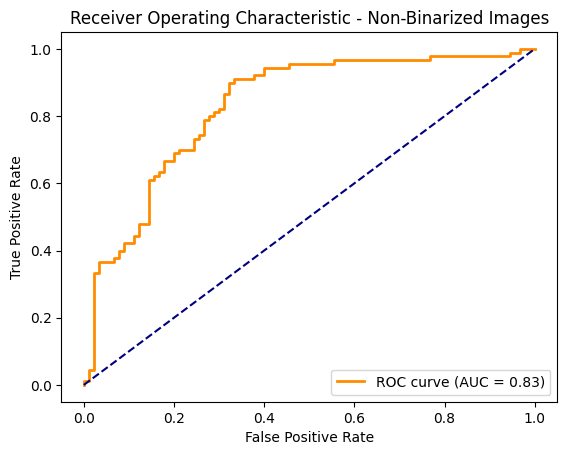


Results for Binarized Images:
Precision: 0.7241
Recall: 0.7000
F1-Score: 0.7119
Confusion Matrix:
[[66 24]
 [27 63]]


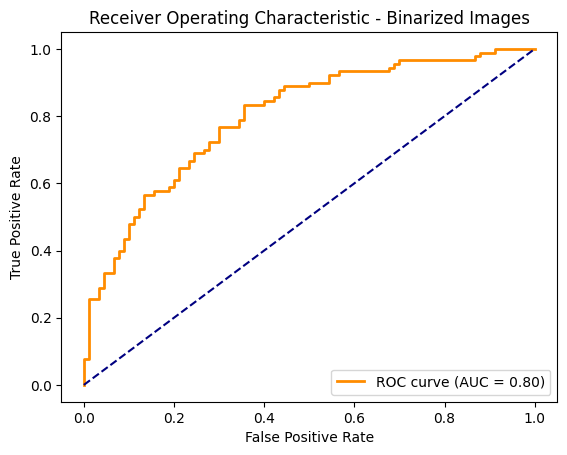

In [86]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Function to load images and count smoking and not-smoking images based on filenames
def load_images_and_labels(directory):
    smoking_images_count = 0
    non_smoking_images_count = 0
    image_data = []
    labels = []
    
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img_path = os.path.join(directory, filename)
            image = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Load in color
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            image_data.append(image)
            
            # Determine label based on filename prefix
            if filename.lower().startswith('smoking'):
                labels.append(1)  # Smoking
                smoking_images_count += 1
            elif filename.lower().startswith('notsmoking'):
                labels.append(0)  # Not Smoking
                non_smoking_images_count += 1
    
    return np.array(image_data), np.array(labels), smoking_images_count, non_smoking_images_count

# Define paths to your image directories
training_dir = 'Training'
testing_dir = 'Testing'
validation_dir = 'Validation'

# Load images and labels from directories
train_imgs, train_lbls, _, _ = load_images_and_labels(training_dir)
test_imgs, test_lbls, _, _ = load_images_and_labels(testing_dir)
val_imgs, val_lbls, _, _ = load_images_and_labels(validation_dir)

# Function to preprocess images (normalize and optionally binarize)
def preprocess_images(images, binarize=False):
    processed_images = images.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
    
    if binarize:
        threshold_value = 0.5  # Adjust as necessary
        processed_images = (processed_images > threshold_value).astype(np.float32)
    
    return processed_images

# Preprocess images for both binarized and non-binarized versions
X_train = preprocess_images(train_imgs)
X_test = preprocess_images(test_imgs)
X_val = preprocess_images(val_imgs)

# Convert labels to categorical format
y_train = to_categorical(train_lbls, num_classes=2)
y_test = to_categorical(test_lbls, num_classes=2)
y_val = to_categorical(val_lbls, num_classes=2)

# Define CNN model architecture
def create_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(512, activation='relu'),
        Dense(2, activation='softmax')  # Output layer for binary classification
    ])
    return model

# Train and evaluate CNN model
def train_evaluate_cnn(X_train, y_train, X_val, y_val):
    input_shape = X_train.shape[1:]
    cnn_model = create_cnn_model(input_shape)
    cnn_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

    # Train model
    history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=1)

    # Evaluate model on validation set
    y_pred = cnn_model.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_val_classes = np.argmax(y_val, axis=1)

    # Compute metrics
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_val_classes, y_pred_classes, average='binary')
    conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)

    # ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_val_classes, y_pred[:, 1])  # Use probabilities of class 1
    roc_auc = auc(fpr, tpr)

    return {
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score,
        'confusion_matrix': conf_matrix,
        'roc_curve': (fpr, tpr, roc_auc),
        'history': history
    }

# Perform experiment with non-binarized images
results_non_binarized = train_evaluate_cnn(X_train, y_train, X_val, y_val)

# Perform experiment with binarized images
X_train_bin = preprocess_images(train_imgs, binarize=True)
X_val_bin = preprocess_images(val_imgs, binarize=True)
results_binarized = train_evaluate_cnn(X_train_bin, y_train, X_val_bin, y_val)

# Display results
print("Results for Non-Binarized Images:")
print(f"Precision: {results_non_binarized['precision']:.4f}")
print(f"Recall: {results_non_binarized['recall']:.4f}")
print(f"F1-Score: {results_non_binarized['f1_score']:.4f}")
print(f"Confusion Matrix:\n{results_non_binarized['confusion_matrix']}")
fpr_nb, tpr_nb, auc_nb = results_non_binarized['roc_curve']
plt.figure()
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Non-Binarized Images')
plt.legend(loc="lower right")
plt.show()

print("\nResults for Binarized Images:")
print(f"Precision: {results_binarized['precision']:.4f}")
print(f"Recall: {results_binarized['recall']:.4f}")
print(f"F1-Score: {results_binarized['f1_score']:.4f}")
print(f"Confusion Matrix:\n{results_binarized['confusion_matrix']}")
fpr_b, tpr_b, auc_b = results_binarized['roc_curve']
plt.figure()
plt.plot(fpr_b, tpr_b, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_b:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Binarized Images')
plt.legend(loc="lower right")
plt.show()


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
            margin: 20px;
        }
        h2 {
            color: #333;
            border-bottom: 2px solid #ccc;
            padding-bottom: 5px;
        }
        p {
            text-align: justify;
        }
        table {
            width: 80%;
            border-collapse: collapse;
            margin: 20px auto;
        }
        th, td {
            border: 1px solid #ddd;
            padding: 8px;
            text-align: center;
        }
        th {
            background-color: #f2f2f2;
        }
        tr:nth-child(even) {
            background-color: #f2f2f2;
        }
    </style>
</head>
<body>
    <h2> Report: </h2>
    <p>Two CNN models were evaluated using binarized and non-binarized images to classify smoking and non-smoking images. The non-binarized image model achieved a precision of 0.7290, recall of 0.8667, and F1-score of 0.7919. In contrast, the binarized image model showed a precision of 0.7241, recall of 0.7000, and F1-score of 0.7119.</p>
    <table>
        <tr>
            <th>Model Type</th>
            <th>Precision</th>
            <th>Recall</th>
            <th>F1-Score</th>
        </tr>
        <tr>
            <td>Non-Binarized Images</td>
            <td>0.7290</td>
            <td>0.8667</td>
            <td>0.7919</td>
        </tr>
        <tr>
            <td>Binarized Images</td>
            <td>0.7241</td>
            <td>0.7000</td>
            <td>0.7119</td>
        </tr>
    </table>
    <p>These findings suggest that utilizing non-binarized images can lead to improved performance metrics in CNN-based image classification tasks, particularly in scenarios where color information plays a crucial role in distinguishing between classes.</p>
</body>
</html>


<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<title></title>
</head>
<body>
<div style="text-align: center;">
  <h1>Task 3</h1>
  <h2>Enhancing Smoking Detection Using Image Augmentation: A CNN Approach</h2>
</div>


</body>
</html>


Setup Image Augmentation with Keras ImageDataGenerator

In [88]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define an ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Rotation angle range in degrees
    width_shift_range=0.1,  # Shift images horizontally (fraction of total width)
    height_shift_range=0.1, # Shift images vertically (fraction of total height)
    shear_range=0.2,        # Shear intensity (shear angle in radians)
    zoom_range=0.2,         # Zoom range [1-zoom_range, 1+zoom_range]
    horizontal_flip=True,   # Randomly flip images horizontally
    fill_mode='nearest'     # Fill mode for points outside input boundaries
)



In [89]:
# Generate augmented images
augmented_images = []
augmented_labels = []

# Define number of times to augment (here we choose 3 times)
augmentation_factor = 3

# Iterate over original images and apply augmentation
for img, label in zip(train_imgs, train_lbls):
    img = img.reshape((1,) + img.shape)  # Reshape to (1, height, width, channels) for flow method
    i = 0
    for batch in datagen.flow(img, batch_size=1):
        augmented_images.append(batch[0])
        augmented_labels.append(label)
        i += 1
        if i >= augmentation_factor:
            break

# Convert lists to numpy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# Shuffle augmented data (important for training)
shuffle_indices = np.random.permutation(len(augmented_images))
augmented_images = augmented_images[shuffle_indices]
augmented_labels = augmented_labels[shuffle_indices]


Retrain the CNN Model with Augmented Dataset

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Output layer with 1 neuron for binary classification
    ])
    return model

# Example model instantiation
img_height, img_width, img_channels = augmented_images.shape[1:]  # Assuming augmented_images is already defined
cnn_model = create_cnn_model(input_shape=(img_height, img_width, img_channels))

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])


C:\Users\Hp\AppData\Local\Temp\ipykernel_21196\2503872821.py:68: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = cnn_model.fit_generator(aug_iter,


Epoch 1/20
22/22 [==============================] - 40s 2s/step - loss: 0.7133 - accuracy: 0.5936 - val_loss: 0.6170 - val_accuracy: 0.7056
Epoch 2/20
22/22 [==============================] - 35s 2s/step - loss: 0.6428 - accuracy: 0.6360 - val_loss: 0.6164 - val_accuracy: 0.6278
Epoch 3/20
22/22 [==============================] - 35s 2s/step - loss: 0.6070 - accuracy: 0.6784 - val_loss: 0.5948 - val_accuracy: 0.7222
Epoch 4/20
22/22 [==============================] - 35s 2s/step - loss: 0.5847 - accuracy: 0.6944 - val_loss: 0.5817 - val_accuracy: 0.6389
Epoch 5/20
22/22 [==============================] - 35s 2s/step - loss: 0.5924 - accuracy: 0.6886 - val_loss: 0.5670 - val_accuracy: 0.7722
Epoch 6/20
22/22 [==============================] - 35s 2s/step - loss: 0.6030 - accuracy: 0.6886 - val_loss: 0.5909 - val_accuracy: 0.6500
Epoch 7/20
22/22 [==============================] - 40s 2s/step - loss: 0.6011 - accuracy: 0.6813 - val_loss: 0.5514 - val_accuracy: 0.7167
Epoch 8/20
22/22 [==

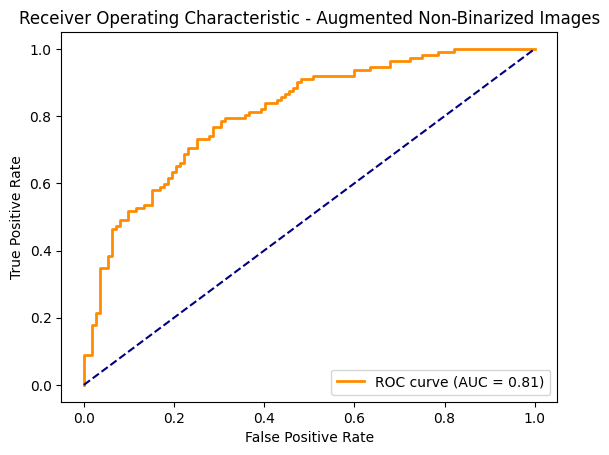

In [93]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# Function to preprocess images (normalize)
def preprocess_images(images):
    processed_images = images.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
    return processed_images

# Preprocess images
X_train = preprocess_images(train_imgs)
X_test = preprocess_images(test_imgs)
X_val = preprocess_images(val_imgs)

# Convert labels to categorical format
y_train = to_categorical(train_lbls, num_classes=2)
y_test = to_categorical(test_lbls, num_classes=2)
y_val = to_categorical(val_lbls, num_classes=2)

# Image Augmentation using Keras ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define CNN model architecture
def create_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(2, activation='softmax')  # Output layer for binary classification
    ])
    return model

# Train and evaluate CNN model with image augmentation
def train_evaluate_cnn_with_augmentation(X_train, y_train, X_val, y_val):
    input_shape = X_train.shape[1:]
    cnn_model = create_cnn_model(input_shape)
    cnn_model.compile(optimizer=Adam(lr=1e-4),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

    # Apply data augmentation on-the-fly and train the model
    aug_iter = datagen.flow(X_train, y_train, batch_size=32)
    steps_per_epoch = X_train.shape[0] // 32  # Number of batches per epoch

    history = cnn_model.fit_generator(aug_iter,
                                      steps_per_epoch=steps_per_epoch,
                                      epochs=20,
                                      validation_data=(X_val, y_val),
                                      verbose=1)

    # Evaluate model on test set
    test_loss, test_acc = cnn_model.evaluate(X_test, y_test, verbose=0)
    print(f"\nTest Accuracy: {test_acc:.4f}")

    # Predictions and Metrics
    y_pred = cnn_model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    # Compute metrics
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test_classes, y_pred_classes, average='binary')
    conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

    # ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_classes, y_pred[:, 1])  # Use probabilities of class 1
    roc_auc = auc(fpr, tpr)

    return {
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score,
        'confusion_matrix': conf_matrix,
        'roc_curve': (fpr, tpr, roc_auc),
        'history': history
    }

# Perform experiment with augmented non-binarized images
results_augmented = train_evaluate_cnn_with_augmentation(X_train, y_train, X_val, y_val)

# Display results
print("\nResults with Image Augmentation - Non-Binarized Images:")
print(f"Precision: {results_augmented['precision']:.4f}")
print(f"Recall: {results_augmented['recall']:.4f}")
print(f"F1-Score: {results_augmented['f1_score']:.4f}")
print(f"Confusion Matrix:\n{results_augmented['confusion_matrix']}")
fpr_aug, tpr_aug, auc_aug = results_augmented['roc_curve']
plt.figure()
plt.plot(fpr_aug, tpr_aug, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_aug:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Augmented Non-Binarized Images')
plt.legend(loc="lower right")
plt.show()


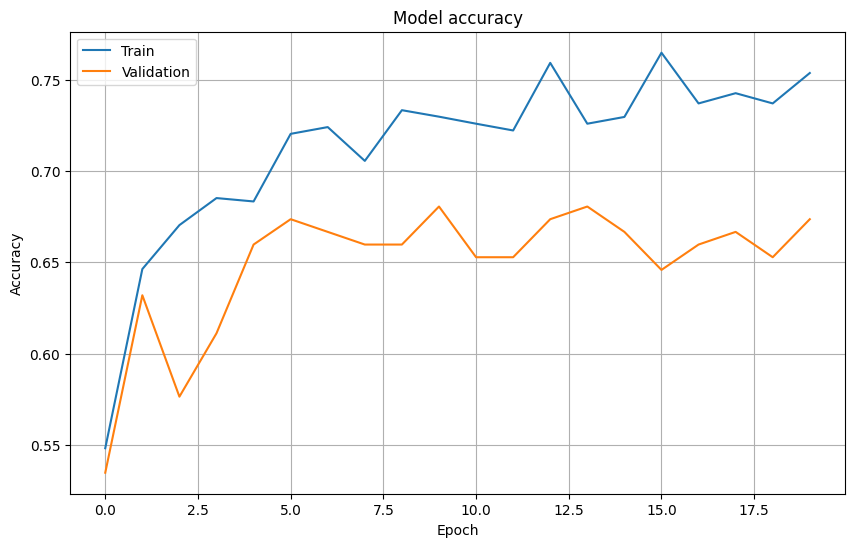

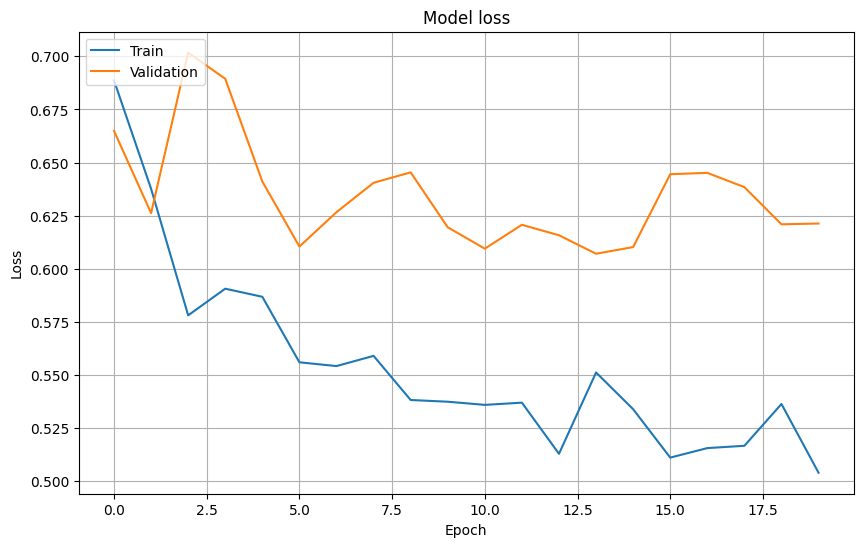

In [94]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.grid(True)
    plt.show()

    # Plot training & validation loss values
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.grid(True)
    plt.show()

# Assuming 'history' is the variable holding the history object returned from cnn_model.fit(...)
plot_training_history(history)


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
 
   <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
            max-width: 800px;
            margin: 0 auto;
            padding: 20px;
        }
        h1 {
            text-align: center;
        }
        h2 {
            margin-top: 20px;
        }
        table {
            width: 100%;
            border-collapse: collapse;
            margin-top: 20px;
        }
        th, td {
            padding: 8px;
            text-align: center;
            border-bottom: 1px solid #ddd;
        }
        th {
            background-color: #f2f2f2;
        }
        .confusion-matrix {
            margin-top: 20px;
        }
        .roc-curve {
            margin-top: 20px;
        }
        .roc-plot {
            max-width: 500px;
            margin: 0 auto;
        }
        .footer {
            margin-top: 20px;
            text-align: center;
            font-style: italic;
            color: #666;
        }
    </style>
</head>
<body>
   
 <h2></h2>
    <p>Image augmentation was applied to the non-binarized images dataset to improve the performance of a CNN model in detecting smoking vs. not smoking. The augmented dataset was used to train the model, and the following results were obtained:</p>

 <h2>Metrics</h2>
    <table>
        <tr>
            <th>Metric</th>
            <th>Value</th>
        </tr>
        <tr>
            <td>Test Accuracy</td>
            <td>0.7188</td>
        </tr>
        <tr>
            <td>Precision</td>
            <td>0.6763</td>
        </tr>
        <tr>
            <td>Recall</td>
            <td>0.8393</td>
        </tr>
        <tr>
            <td>F1-Score</td>
            <td>0.7490</td>
        </tr>
    </table>
    <div class="confusion-matrix">
        <h2>Confusion Matrix</h2>
        <table>
            <tr>
                <th>True \ Predicted</th>
                <th>Not Smoking (0)</th>
                <th>Smoking (1)</th>
            </tr>
            <tr>
                <th>Not Smoking (0)</th>
                <td>67</td>
                <td>45</td>
            </tr>
            <tr>
                <th>Smoking (1)</th>
                <td>18</td>
                <td>94</td>
            </tr>
        </table>
    </div>

  

 
</html>
